In [98]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [99]:
import numpy as np 
import scipy.fft
from operators.legendre.setup_legendre import SimulationSetupLegendre
from operators.poisson_solver import gmres_solver
from operators.legendre.legendre_operators import xi_legendre, charge_density_legendre, total_mass_legendre, total_momentum_legendre, total_energy_k_legendre

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

# Enable LaTeX rendering
matplotlib.rcParams['text.usetex'] = True

In [101]:
# Get the 'inferno' colormap
inferno_cmap = plt.get_cmap('inferno')

# Sample the colormap at three different points (e.g., 25%, 50%, 75%)
color1 = inferno_cmap(0.)
color2 = inferno_cmap(0.4)
color3 = inferno_cmap(0.75)

# Distribution function comparison

In [102]:
Nv_vec = 2**np.array([5, 6, 7, 8])
x = np.linspace(0, 20*np.pi, 102, endpoint=True)
v = np.linspace(-5, 15, 15000, endpoint=True)
t = np.linspace(0, 120, int(120/0.01) + 1, endpoint=True)
v_a = 4
v_b = 15
Nv_e1 = 17 

In [103]:
skip = 200
skip_2 = 4
E_reference = np.load("/Users/oissan/PycharmProjects/mixed_methods/data/finite_difference/bump_on_tail/E_Nv_60000_Nx_101_120.npy")
f_reference = np.load("/Users/oissan/PycharmProjects/mixed_methods/data/finite_difference/bump_on_tail/sol_u_Nv_60000_Nx_101_120.npy")[:, :, -1]

In [104]:
# skip=1
# skip_2 = 1
# f_reference = np.load("../data/legendre/bump_on_tail/distribution_t_120_" + str(2**9) +"_Nx_101_0_120.npy")[:-1, ::skip]
# E_reference = np.load("../data/legendre/bump_on_tail/E_field_" + str(2**9) +"_Nx_101_0_120.npy")[:-1, :]


In [105]:
idx = np.argmin(np.abs(v-5))
print(idx)

7500


FileNotFoundError: [Errno 2] No such file or directory: '../data/aw_hermite/bump_on_tail/distribution_t_120_16_Nve2_240_Nx_101_0_120.npy'

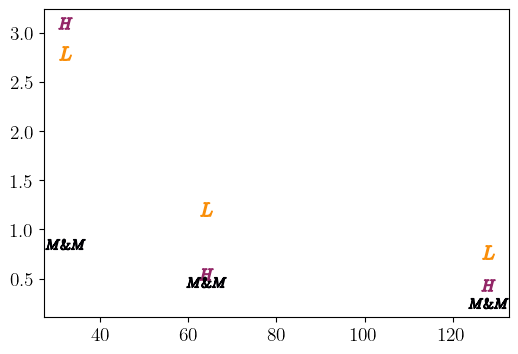

In [106]:
fig, ax = plt.subplots(figsize=(6, 4))

for Nv in Nv_vec:
    f_legendre = np.load("../data/legendre/bump_on_tail/distribution_t_120_" + str(Nv) + "_Nx_101_0_120.npy")[:-1, :]
    f_hermite = np.load("../data/aw_hermite/bump_on_tail/distribution_t_120_16_Nve2_" + str(Nv-16) + "_Nx_101_0_120.npy")[:-1, :]
    f_mm = np.load("../data/mixed_method_1_aw_hermite_legendre/bump_on_tail/distribution_t_120_" + str(Nv_e1) + "_NvL_" + str(Nv-Nv_e1) +"_Nx_101_v_a_" + str(v_a) + "_v_b_" + str(v_b) + "_0_120.npy")[:-1, :]
    # compute errors
    error_legendre = np.linalg.norm(np.abs((f_legendre - f_reference[:, ::skip_2])[:, idx:]), ord=2)
    error_hermite = np.linalg.norm(np.abs((f_hermite - f_reference[:, ::skip_2])[:, idx:]), ord=2)
    error_mm = np.linalg.norm(np.abs((f_mm - f_reference[:, ::skip_2])[:, idx:]), ord=2)
    
    ax.scatter(Nv, error_legendre, marker=f"$L$", color=color3, s=90)
    ax.scatter(Nv, error_hermite, marker=f"$H$", color=color2, s=90)
    ax.scatter(Nv, error_mm, marker=f"$M\& M$", color=color1, s=800)


ax.set_yscale("log")
ax.set_xscale('log', base=2)
#ax.set_yticks([1e-2, 1e-1, 1, 10])
ax.set_xticks(Nv_vec)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(alpha=0.2)
ax.set_xlabel("DOFs")
ax.set_ylabel("$L_{2}$ error")
plt.tight_layout()
plt.savefig("../figures/comparison/error_bump_on_tail.png", dpi=600)

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))
pos = ax[0].pcolormesh(v, x[:-1], np.abs(f_hermite - f_reference[:, ::4]))
plt.colorbar(pos)
ax[0].set_xlabel("$v$")
ax[0].set_ylabel("$x$")
ax[0].set_title(r"$|f_{H}(x, v, t=120) - f_{*}(x, v, t=120)|$")

pos = ax[1].pcolormesh(v, x[:-1], np.abs(f_legendre - f_reference[:, ::4]))
plt.colorbar(pos)
ax[1].set_xlabel("$v$")
ax[1].set_ylabel("$x$")
ax[1].set_xlabel("$v$")
ax[1].set_ylabel("$x$")
ax[1].set_title(r"$|f_{L}(x, v, t=120) - f_{*}(x, v, t=120)|$")

pos = ax[2].pcolormesh(v, x[:-1], np.abs(f_mm - f_reference[:, ::4]))
plt.colorbar(pos)
ax[2].set_xlabel("$v$")
ax[2].set_ylabel("$x$")
ax[2].set_xlabel("$v$")
ax[2].set_ylabel("$x$")
ax[2].set_title(r"$|f_{M\& M}(x, v, t=120) - f_{*}(x, v, t=120)|$")

plt.tight_layout()
plt.savefig("../figures/comparison/bump_on_tail_phase_comparison.png")

In [ ]:
error_legendre = np.zeros(len(Nv_vec))
error_hermite = np.zeros(len(Nv_vec))
error_mm = np.zeros(len(Nv_vec))

In [ ]:
for ii, Nv in enumerate(Nv_vec):
    E_legendre = np.load("../data/legendre/bump_on_tail/E_field_" + str(Nv) + "_Nx_101_0_120.npy")[:-1, ::skip]
    E_hermite = np.load("../data/aw_hermite/bump_on_tail/E_field_16_Nve2_" + str(Nv-16) + "_Nx_101_0_120.npy")[:-1, ::skip]
    E_mm = np.load("../data/mixed_method_1_aw_hermite_legendre/bump_on_tail/E_field_" + str(Nv_e1) + "_NvL_" + str(Nv-Nv_e1) +"_Nx_101_v_a_" + str(v_a) + "_v_b_" + str(v_b) + "_0_120.npy")[:-1, ::skip]
    # compute errors
    error_legendre[ii] = np.linalg.norm(np.abs(E_legendre - E_reference), ord=2)
    error_hermite[ii] = np.linalg.norm(np.abs(E_hermite - E_reference), ord=2)
    error_mm[ii] = np.linalg.norm(np.abs(E_mm - E_reference), ord=2)

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 3))
_ = ax[0].plot((E_legendre - E_reference)[:, ::10])
_ = ax[1].plot((E_mm - E_reference)[:, ::10])
_ = ax[2].plot((E_hermite- E_reference)[:, ::10])

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
 
ax.scatter(Nv_vec, error_legendre, marker=f"$L$", color=color3, s=90)
ax.scatter(Nv_vec, error_hermite, marker=f"$H$", color=color2, s=90)
ax.scatter(Nv_vec, error_mm, marker=f"$M\& M$", color=color1, s=800)

#ax.set_xlim(2**4.8, 2**8.2)
ax.set_yscale("log")
ax.set_xscale('log', base=2)
#ax.set_yticks([1e-2, 1e-1, 1, 10])
ax.set_xticks(Nv_vec)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(alpha=0.2)
ax.set_xlabel("DOFs")
ax.set_ylabel(r"$\| E(x, t) - E^{*}(x, t) \|_{2}$")
plt.tight_layout()
plt.savefig("../figures/comparison/error_bump_on_tail.png", dpi=600)

In [ ]:
runtime_legendre = np.zeros(len(Nv_vec))
runtime_hermite = np.zeros(len(Nv_vec))
runtime_mm = np.zeros(len(Nv_vec))

In [ ]:
for ii, Nv in enumerate(Nv_vec):
    runtime_legendre[ii] = np.load("../data/legendre/bump_on_tail/sol_runtime_Nv_" + str(Nv) + "_Nx_101_0_120.npy")[0]/60/60
    runtime_mm[ii] = np.load("../data/mixed_method_1_aw_hermite_legendre/bump_on_tail/sol_runtime_NvH_16_NvL_" + str(Nv-16) +"_Nx_101_v_a_4_v_b_15_0_120.npy")[0]/60/60
    runtime_hermite[ii] = np.load("../data/aw_hermite/bump_on_tail/sol_runtime_Nve1_16_Nve2_" + str(Nv-16) +"_Nx_101_0_120.npy")[0]/60/60

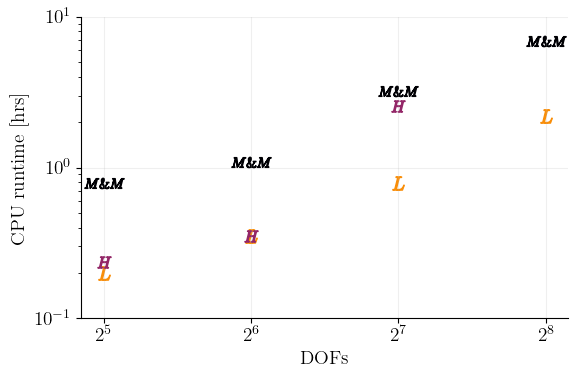

In [107]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(Nv_vec, runtime_legendre, marker=f"$L$", color=color3, s=90)
ax.scatter(Nv_vec, runtime_hermite, marker=f"$H$", color=color2, s=90)
ax.scatter(Nv_vec, runtime_mm, marker=f"$M\& M$", color=color1, s=800)

#ax.set_xlim(2**4.8, 2**8.2)
ax.set_yscale("log")
ax.set_xscale('log', base=2)
ax.set_yticks([1e-1, 1, 10])
ax.set_xticks(Nv_vec)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(alpha=0.2)
ax.set_xlabel("DOFs")
ax.set_ylabel("CPU runtime [hrs]")
plt.tight_layout()
plt.savefig("../figures/comparison/runtime_bump_on_tail.png", dpi=600)

/var/folders/tt/hgb4_vc13z77x5wpt5lzk5j40000gn/T/ipykernel_2247/1960087986.py:5: RuntimeWarning: divide by zero encountered in divide
  ax.scatter(Nv_vec, 1/(runtime_hermite*error_hermite), marker=f"$H$", color=color2, s=90)


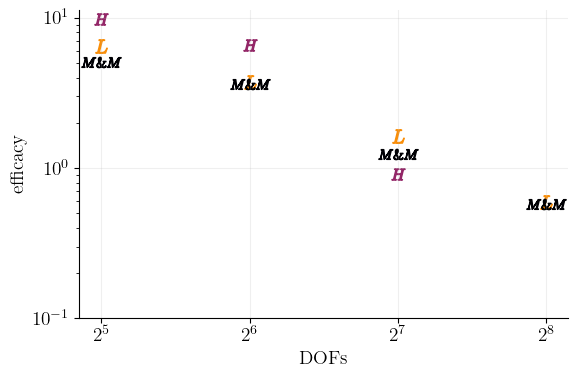

In [108]:
fig, ax = plt.subplots(figsize=(6, 4))


ax.scatter(Nv_vec, 1/(runtime_legendre*error_legendre), marker=f"$L$", color=color3, s=90)
ax.scatter(Nv_vec, 1/(runtime_hermite*error_hermite), marker=f"$H$", color=color2, s=90)
ax.scatter(Nv_vec, 1/(runtime_mm*error_mm), marker=f"$M\& M$", color=color1, s=800)
#ax.set_xlim(2**6.5, 2**9.5)
ax.set_yscale("log")
ax.set_yticks([1e-1, 1, 1e1])
ax.set_xscale('log', base=2)
ax.set_xticks(Nv_vec)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(alpha=0.2)
ax.set_xlabel("DOFs")
ax.set_ylabel("efficacy")
plt.tight_layout()
plt.savefig("../figures/comparison/efficacy_bump_on_tail.png", dpi=600)

# f(x, v, t) visualization

FileNotFoundError: [Errno 2] No such file or directory: '../data/aw_hermite/bump_on_tail/distribution_t_120_16_Nve2_240_Nx_101_0_120.npy'

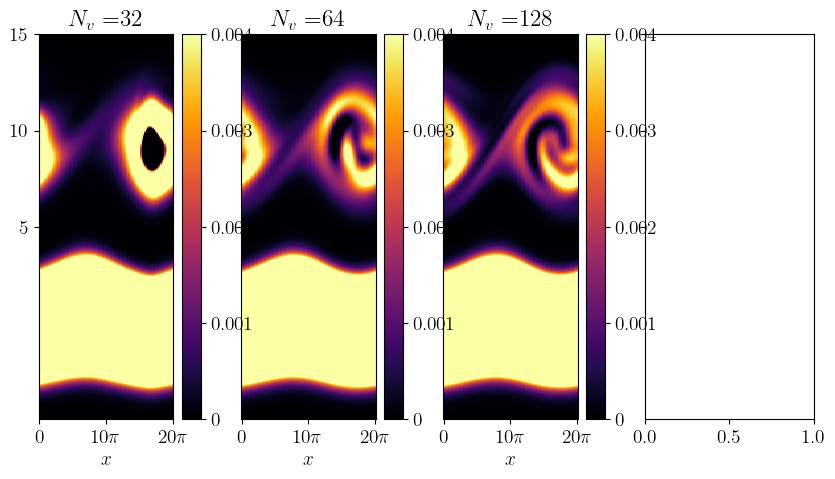

In [38]:
fig, ax = plt.subplots(ncols=4, figsize=(10, 5), sharey=True)

for ii, Nv in enumerate(2**np.array([5, 6, 7, 8])):
    distribution = np.load("../data/aw_hermite/bump_on_tail/distribution_t_120_16_Nve2_" + str(Nv-16) + "_Nx_101_0_120.npy")
    pos = ax[ii].pcolormesh(x, v, distribution.T, cmap="inferno", vmin=0, vmax=0.004)
    cbar = fig.colorbar(pos)
    cbar.set_ticks([0, 0.001, 0.002, 0.003, 0.004])
    cbar.set_ticklabels(["0", "0.001", "0.002", "0.003", "0.004"])
    ax[ii].set_title("$N_{v} = $" + str(Nv))
    ax[ii].set_xticks([0, 10*np.pi, 20*np.pi])
    ax[ii].set_xticklabels(["$0$", "$10\pi$", "$20\pi$"]) 
    ax[ii].set_ylim(-5, 15)
    ax[ii].set_xlabel("$x$")
    ax[ii].set_yticks([5, 10, 15])
ax[0].set_ylabel("$v$")
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(10, 5), sharey=True)

for ii, Nv in enumerate(2**np.array([5, 6, 7, 8])):
    distribution = np.load("../data/mixed_method_1_aw_hermite_legendre/bump_on_tail/distribution_t_120_16_NvL_" + str(Nv-16) 
                           + "_Nx_101_v_a_4_v_b_15_0_120.npy")
    pos = ax[ii].pcolormesh(x, v, distribution.T, cmap="inferno", vmin=0, vmax=0.004)
    cbar = fig.colorbar(pos)
    cbar.set_ticks([0, 0.001, 0.002, 0.003, 0.004])
    cbar.set_ticklabels(["0", "0.001", "0.002", "0.003", "0.004"])
    ax[ii].set_title("$N_{v} = $" + str(Nv))
    ax[ii].set_xticks([0, 10*np.pi, 20*np.pi])
    ax[ii].set_xticklabels(["$0$", "$10\pi$", "$20\pi$"]) 
    ax[ii].set_ylim(-5, 15)
    ax[ii].set_xlabel("$x$")
    ax[ii].set_yticks([5, 10, 15])
ax[0].set_ylabel("$v$")
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(10, 5), sharey=True)

for ii, Nv in enumerate(2**np.array([6, 7, 8, 9])):
    distribution = np.load("../data/legendre/bump_on_tail/distribution_t_120_" + str(Nv)  + "_Nx_101_0_120.npy")
    pos = ax[ii].pcolormesh(x, v, distribution.T, cmap="inferno", vmin=0, vmax=0.004)
    cbar = fig.colorbar(pos)
    cbar.set_ticks([0, 0.001, 0.002, 0.003, 0.004])
    cbar.set_ticklabels(["0", "0.001", "0.002", "0.003", "0.004"])
    ax[ii].set_title("$N_{v} = $" + str(Nv))
    ax[ii].set_xticks([0, 10*np.pi, 20*np.pi])
    ax[ii].set_xticklabels(["$0$", "$10\pi$", "$20\pi$"]) 
    ax[ii].set_ylim(-5, 15)
    ax[ii].set_xlabel("$x$")
    ax[ii].set_yticks([5, 10, 15])
ax[0].set_ylabel("$v$")
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))

distribution = np.load("../data/aw_hermite/bump_on_tail/distribution_t_120_16_Nve2_" + str(64-16) + "_Nx_101_0_120.npy")
pos = ax.pcolormesh(x, v, distribution.T, cmap="inferno", vmin=0, vmax=0.004)
cbar = fig.colorbar(pos)
cbar.set_ticks([0, 0.001, 0.002, 0.003, 0.004])
cbar.set_ticklabels(["0", "0.001", "0.002", "0.003", "0.004"])
#ax.set_title("Hermite")
ax.set_xticks([0, 10*np.pi, 20*np.pi])
ax.set_xticklabels(["$0$", "$10\pi$", "$20\pi$"]) 
ax.set_ylim(-5, 15)
ax.set_xlabel("$x$")
ax.set_ylabel("$v$")
ax.set_yticks([-5, 0, 5, 10, 15])
plt.tight_layout()
plt.savefig("../figures/comparison/bump_on_tail_phase_space_hermite.png", dpi=600)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))

distribution = np.load("../data/legendre/bump_on_tail/distribution_t_120_64_Nx_101_0_120.npy")
pos = ax.pcolormesh(x, v, distribution.T, cmap="inferno", vmin=0, vmax=0.004)
cbar = fig.colorbar(pos)
cbar.set_ticks([0, 0.001, 0.002, 0.003, 0.004])
cbar.set_ticklabels(["0", "0.001", "0.002", "0.003", "0.004"])
#ax.set_title("Hermite")
ax.set_xticks([0, 10*np.pi, 20*np.pi])
ax.set_xticklabels(["$0$", "$10\pi$", "$20\pi$"]) 
ax.set_ylim(-5, 15)
ax.set_xlabel("$x$")
ax.set_ylabel("$v$")
ax.set_yticks([-5, 0, 5, 10, 15])
plt.tight_layout()
plt.savefig("../figures/comparison/bump_on_tail_phase_space_legendre.png", dpi=600)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))

distribution = np.load("../data/mixed_method_1_aw_hermite_legendre/bump_on_tail/distribution_t_120_16_NvL_" + str(64-16) 
                           + "_Nx_101_v_a_4_v_b_15_0_120.npy")
pos = ax.pcolormesh(x, v, distribution.T, cmap="inferno", vmin=0, vmax=0.004)
cbar = fig.colorbar(pos)
cbar.set_ticks([0, 0.001, 0.002, 0.003, 0.004])
cbar.set_ticklabels(["0", "0.001", "0.002", "0.003", "0.004"])
#ax.set_title("Hermite")
ax.set_xticks([0, 10*np.pi, 20*np.pi])
ax.set_xticklabels(["$0$", "$10\pi$", "$20\pi$"]) 
ax.set_ylim(-5, 15)
ax.set_xlabel("$x$")
ax.set_ylabel("$v$")
ax.set_yticks([-5, 0, 5, 10, 15])
plt.tight_layout()
plt.savefig("../figures/comparison/bump_on_tail_phase_space_mixed_method.png", dpi=600)

In [ ]:
E_legendre = np.load("../data/legendre/bump_on_tail/E_field_64_Nx_101_0_120.npy")
E_hermite = np.load("../data/aw_hermite/bump_on_tail/E_field_16_Nve2_48_Nx_101_0_120.npy")
E_mm = np.load("../data/mixed_method_1_aw_hermite_legendre/bump_on_tail/E_field_16_NvL_48_Nx_101_v_a_4_v_b_15_0_120.npy")

In [ ]:
# plot the electric field damping rate
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(t, 3e-4*np.exp(0.08976*t), linewidth=3, color="red", label=r"Linear theory $\gamma = 0.0897$") 

ax.plot(t, np.abs(np.fft.fft(E_legendre, axis=0, norm="forward")[1, :]), "--", c=color3, alpha=0.5, linewidth=3, label="Legendre") 
ax.plot(t, np.abs(np.fft.fft(E_hermite, axis=0, norm="forward")[1, :]), "-.", c=color2, alpha=0.5, linewidth=3, label="Hermite")
ax.plot(t, np.abs(np.fft.fft(E_mm, axis=0, norm="forward")[1, :]), ":", c=color1, alpha=0.5, linewidth=3, label="Mixed Method")

ax.set_yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$|\hat{E}(k=\frac{1}{10}, t)|$")
ax.set_xlabel("$ t$")
ax.set_xlim(0, 120)
ax.set_ylim(1e-6, 1e2)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='lower right')
legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("../figures/comparison/bump_on_tail_growth_rate.png", dpi=500)